In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [17]:
import os
os.makedirs("visualizations", exist_ok=True)

In [18]:
df_cleaned = pd.read_csv("../EDA-Data-cleaning/data_cleaned.csv")


# I. DATASET OVERVIEW

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3556 entries, 0 to 3555
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  3556 non-null   object
 1   description   3556 non-null   object
 2   brand         3556 non-null   object
 3   category      3556 non-null   object
dtypes: object(4)
memory usage: 111.3+ KB


## 1. Phân bố số lượng theo Category

In [20]:
category_counts = df_cleaned["category"].value_counts()
print("Tổng số category:", category_counts.shape[0])
print("Các category và số lượng sản phẩm tương ứng:")
category_counts

Tổng số category: 12
Các category và số lượng sản phẩm tương ứng:


category
Laptop & Máy tính        300
Đồ gia dụng              300
Mỹ phẩm & Làm đẹp        299
Điện thoại & Phụ kiện    299
Thực phẩm & Đồ uống      299
Thời trang Nam           298
Thời trang Nữ            297
Thể thao & Du lịch       297
Giày dép                 295
Nhà cửa & Đời sống       293
Đồ chơi trẻ em           291
Sách & Văn phòng phẩm    288
Name: count, dtype: int64

C:\Users\Bcmyg\AppData\Local\Temp\ipykernel_34064\3030836310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


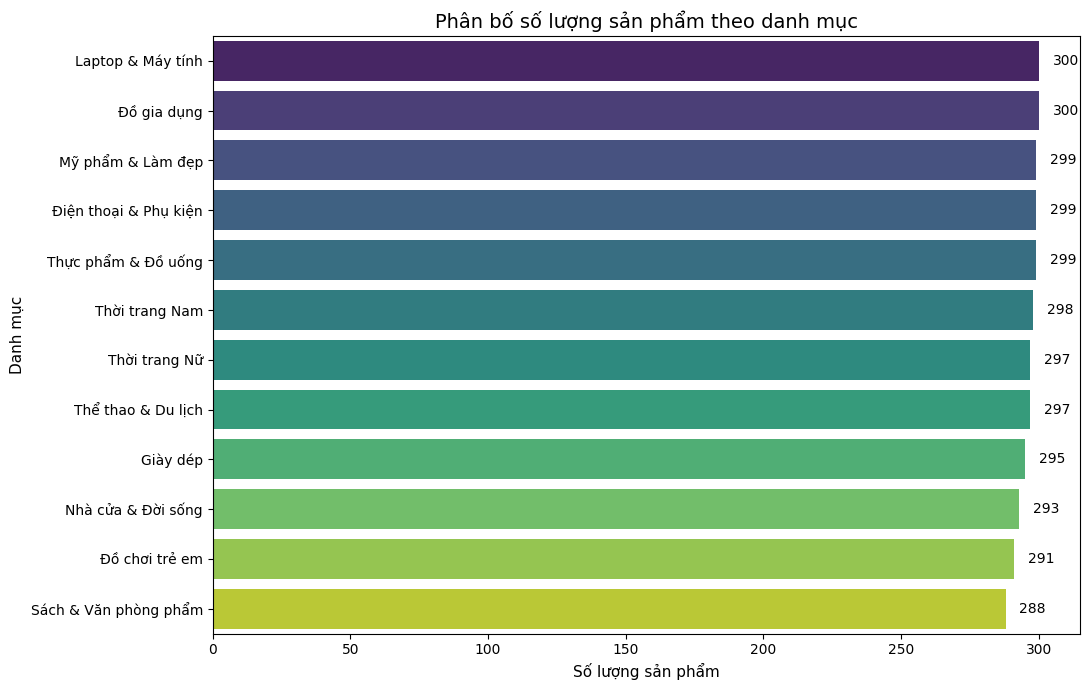

In [21]:
plt.figure(figsize=(11, 7))

ax = sns.countplot(
    y="category",
    data=df_cleaned,
    order=df_cleaned["category"].value_counts().index,
    palette="viridis"
)

plt.title("Phân bố số lượng sản phẩm theo danh mục", fontsize=14)
plt.xlabel("Số lượng sản phẩm", fontsize=11)
plt.ylabel("Danh mục", fontsize=11)

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 5,                      
        p.get_y() + p.get_height() / 2,
        f"{int(width)}",
        va="center",
        fontsize=10
    )

plt.tight_layout()
plt.savefig("visualizations/01_class_balance.png", dpi=300)
plt.show()

Nhận xét về độ cân bằng dữ liệu:
- Dữ liệu phân bố tương đối đồng đều giữa các lớp
- Chênh lệch giữa các lớp nhỏ: Từ 288 đến 300 mẫu (chênh lệch chỉ ~4%)
- Không có imbalance nghiêm trọng -> Không lo mô hình bị bias về 1 phía
- F1-score, Precision, Recall sẽ ổn định giữa các lớp

## 2. Phân bố Brand

In [22]:
brand_counts = df_cleaned["brand"].value_counts()
num_single_brands = (brand_counts == 1).sum()
print("Số brand:", df_cleaned["brand"].nunique())
print("Số brand chỉ xuất hiện 1 lần:", num_single_brands)
print("Tỷ lệ brand chỉ xuất hiện 1 lần: {:.2f}%".format(num_single_brands / len(brand_counts) * 100))
print("\nTop 20 brand phổ biến nhất:")

top_brands = df_cleaned["brand"].value_counts().nlargest(20)
top_brands

Số brand: 800
Số brand chỉ xuất hiện 1 lần: 408
Tỷ lệ brand chỉ xuất hiện 1 lần: 51.00%

Top 20 brand phổ biến nhất:


brand
oem               290
unknown           188
naturehike         74
biti s             62
xiaomi             60
bee gee            56
coleman            55
haint boutique     53
deli               41
samsung            39
tp link            38
elmich             37
th                 36
365 fresh          32
rosata             31
senterlan          31
panasonic          28
philips            28
cresta             27
orico              27
Name: count, dtype: int64

In [26]:
brand_category_diversity = (
    df_cleaned
    .groupby("brand")["category"]
    .nunique()
    .sort_values(ascending=False)
)

brand_category_diversity.describe()

count    800.000000
mean       1.071250
std        0.333635
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        6.000000
Name: category, dtype: float64

C:\Users\Bcmyg\AppData\Local\Temp\ipykernel_34064\1857555619.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


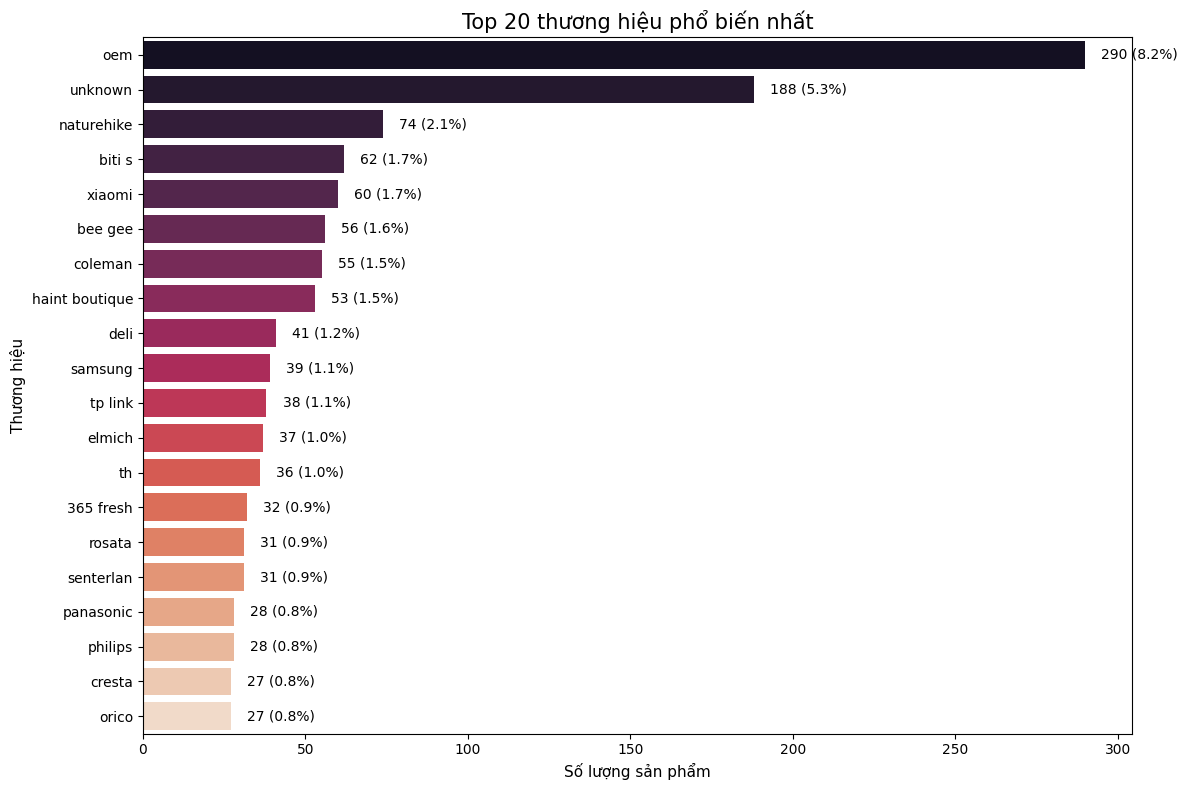

In [27]:
plt.figure(figsize=(12, 8))

top_20_brands = (
    df_cleaned["brand"]
    .value_counts()
    .head(20)
)

ax = sns.barplot(
    x=top_20_brands.values,
    y=top_20_brands.index,
    palette="rocket"
)

plt.title("Top 20 thương hiệu phổ biến nhất", fontsize=15)
plt.xlabel("Số lượng sản phẩm", fontsize=11)
plt.ylabel("Thương hiệu", fontsize=11)

# 🔹 Ghi giá trị + %
total = len(df_cleaned)

for p in ax.patches:
    width = p.get_width()
    percent = width / total * 100
    ax.text(
        width + 5,
        p.get_y() + p.get_height() / 2,
        f"{int(width)} ({percent:.1f}%)",
        va="center",
        fontsize=10
    )

plt.tight_layout()
plt.savefig(
    "visualizations/02_top_brands.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

Nhận xét về phân bố Brand:
- Xuất hiện phân bố "Long-Tail":
    + Hơn 50% brand chỉ xuất hiện 1 lần (408/800)
    + Top 2 brand (OEM + Unknown) chiếm 59.7% tổng dataset (478/≈3000 mẫu)
    + Phân bố cực kỳ lệch: 20 brand phổ biến nhất chiếm ~40% tổng dữ liệu
- Brand không rõ nguồn gốc ("oem", "unknown") chiếm ưu thế
- Đa dạng sản phẩm thấp: 75% brand chỉ xuất hiện trong 1 category
- Có brand đa ngành (max 6 categories) nhưng rất hiếm

-> Lưu ý tránh overfitting


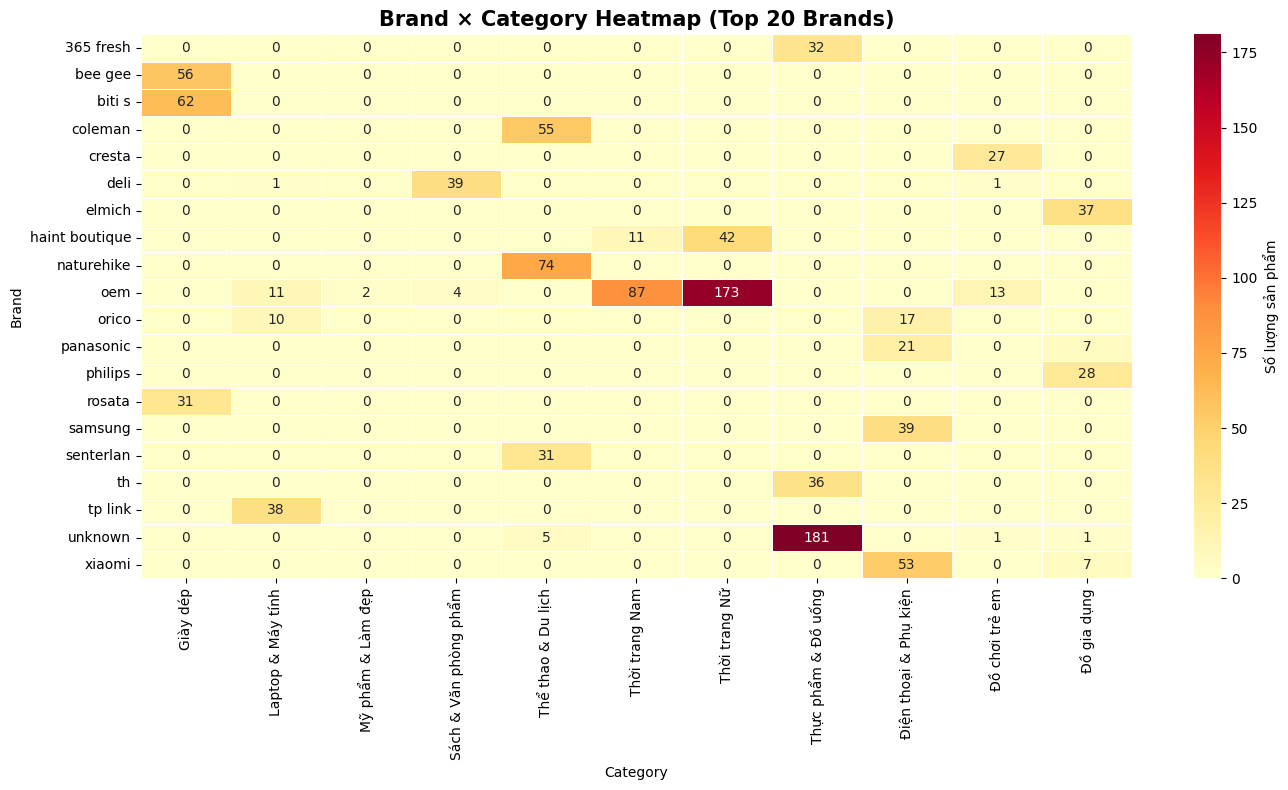

In [28]:
df_top = df_cleaned[df_cleaned["brand"].isin(top_brands.index)]
brand_category_matrix = pd.pivot_table(
    df_top,
    index="brand",
    columns="category",
    values="product_name",
    aggfunc="count",
    fill_value=0
)
plt.figure(figsize=(14, 8))

sns.heatmap(
    brand_category_matrix,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    linewidths=0.5,
    cbar_kws={"label": "Số lượng sản phẩm"}
)

plt.title(
    "Brand × Category Heatmap (Top 20 Brands)",
    fontsize=15,
    weight="bold"
)
plt.xlabel("Category")
plt.ylabel("Brand")

plt.tight_layout()
plt.savefig("visualizations/03_brand_category_heatmap.png", dpi=300)
plt.show()


# II. TEXT CHARACTERISTICS ANALYSIS

## 1. Phân bổ số từ

In [29]:
df_cleaned['name_length'] = df_cleaned['product_name'].str.len()
df_cleaned['desc_length'] = df_cleaned['description'].str.len()
df_cleaned['name_word_count'] = df_cleaned['product_name'].str.split().str.len()
df_cleaned['desc_word_count'] = df_cleaned['description'].str.split().str.len()

print("Thống kê độ dài:")
print(f"Product name - Trung bình: {df_cleaned['name_length'].mean():.1f} ký tự")
print(f"Description - Trung bình: {df_cleaned['desc_length'].mean():.1f} ký tự")
print(f"Product name - Trung bình: {df_cleaned['name_word_count'].mean():.1f} từ")
print(f"Description - Trung bình: {df_cleaned['desc_word_count'].mean():.1f} từ")

Thống kê độ dài:
Product name - Trung bình: 63.7 ký tự
Description - Trung bình: 1298.3 ký tự
Product name - Trung bình: 13.6 từ
Description - Trung bình: 291.7 từ


In [32]:
df_cleaned["name_word_count"].describe()

count    3556.000000
mean       13.554837
std         7.221477
min         2.000000
25%         9.000000
50%        12.000000
75%        17.000000
max        59.000000
Name: name_word_count, dtype: float64

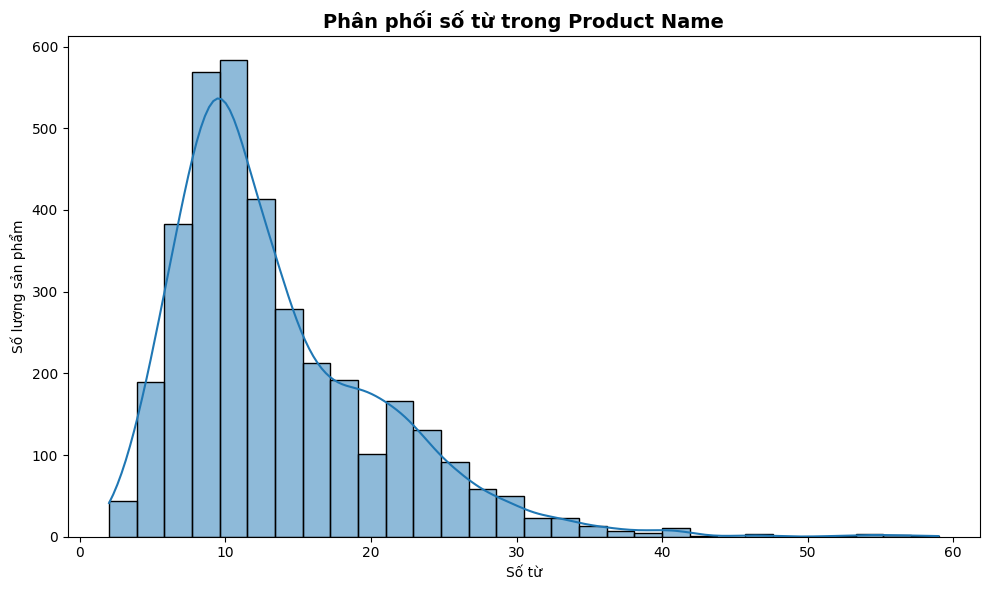

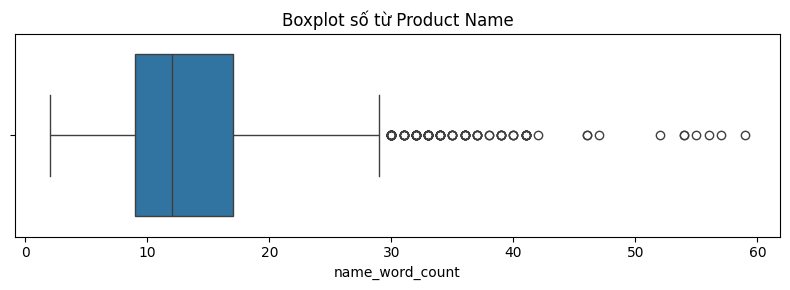

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df_cleaned["name_word_count"],
    bins=30,
    kde=True
)

plt.title("Phân phối số từ trong Product Name", fontsize=14, weight="bold")
plt.xlabel("Số từ")
plt.ylabel("Số lượng sản phẩm")

plt.tight_layout()
plt.savefig("visualizations/04_name_word_distribution.png", dpi=300)
plt.show()

plt.figure(figsize=(8, 3))
sns.boxplot(x=df_cleaned["name_word_count"])
plt.title("Boxplot số từ Product Name")
plt.tight_layout()
plt.savefig("visualizations/05_name_word_boxplot.png", dpi=300)
plt.show()

In [33]:
df_cleaned["desc_word_count"].describe()

count    3556.000000
mean      291.678571
std       264.811707
min         5.000000
25%       103.000000
50%       218.000000
75%       422.000000
max      4415.000000
Name: desc_word_count, dtype: float64

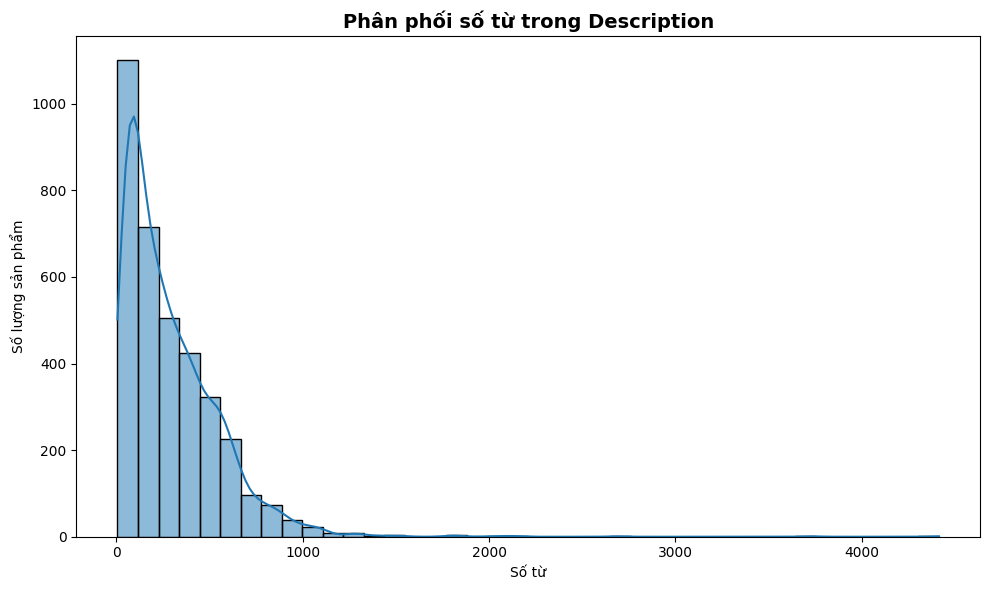

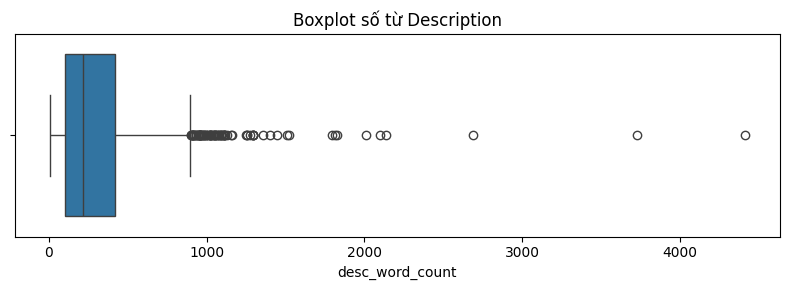

In [34]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df_cleaned["desc_word_count"],
    bins=40,
    kde=True
)

plt.title("Phân phối số từ trong Description", fontsize=14, weight="bold")
plt.xlabel("Số từ")
plt.ylabel("Số lượng sản phẩm")

plt.tight_layout()
plt.savefig("visualizations/06_description_word_distribution.png", dpi=300)
plt.show()

plt.figure(figsize=(8, 3))
sns.boxplot(x=df_cleaned["desc_word_count"])
plt.title("Boxplot số từ Description")
plt.tight_layout()
plt.savefig("visualizations/07_description_word_boxplot.png", dpi=300)
plt.show()

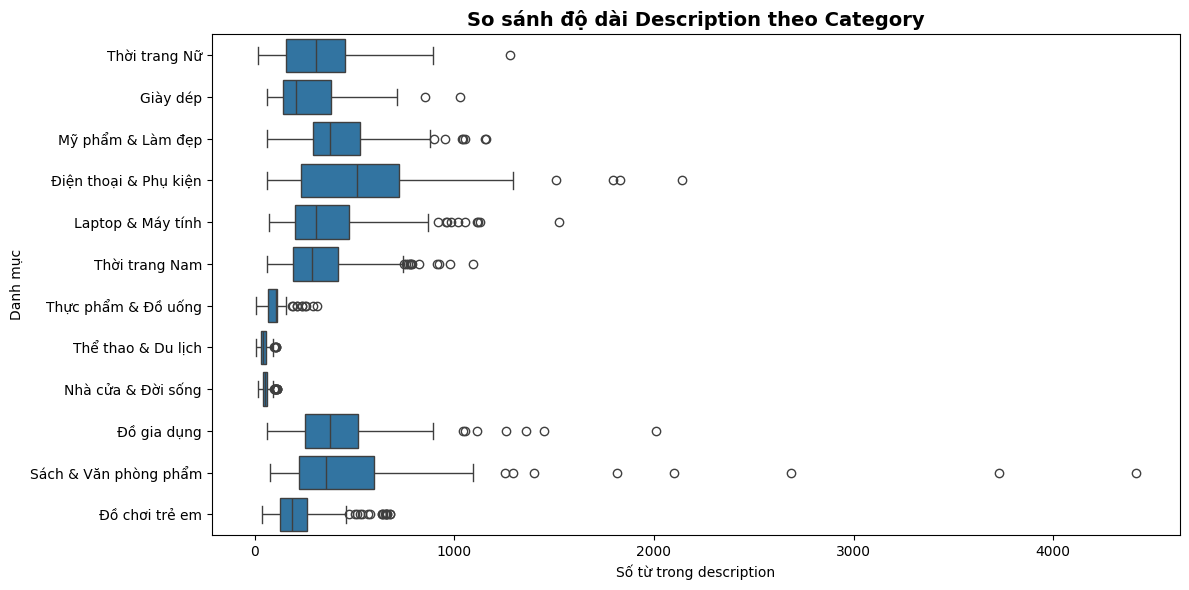

In [35]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    y="category",
    x="desc_word_count",
    data=df_cleaned
)

plt.title("So sánh độ dài Description theo Category", fontsize=14, weight="bold")
plt.xlabel("Số từ trong description")
plt.ylabel("Danh mục")

plt.tight_layout()
plt.savefig("visualizations/08_desc_length_by_category.png", dpi=300)
plt.show()


## 2. WordCloud

In [36]:
from wordcloud import WordCloud
from underthesea import word_tokenize
from collections import Counter

In [37]:
vietnamese_stopwords = set([
    "và", "là", "có", "cho", "với", "các", "được", "trong", "khi", "từ",
    "sản", "phẩm", "này", "không", "một", "những", "đến", "theo",
    "giúp", "đảm", "bảo", "hàng", "chính", "hãng", "của", "tại", "rất", "sản_phẩm", "chính_hãng", "bảo_hành", "thương_hiệu", 
    "chất_lượng", "cao_cấp", "thiết_kế", "sử_dụng", "thời_gian",
    "cam_kết", "uy_tín", "hỗ_trợ", "miễn_phí", "giao_hàng", "toàn_quốc", "đổi_trả", "dễ_dàng", "tiện_lợi"
])
def tokenize_and_remove_stopwords(text):
    if not isinstance(text, str) or text.strip() == "":
        return ""
    
    tokens = word_tokenize(text, format="text").split()
    
    clean_tokens = []
    for token in tokens:
        token_lower = token.lower()
        if (token_lower not in vietnamese_stopwords) and \
           (not token.isnumeric()) and \
           (len(token) > 1) and \
           (token.isalnum() or "_" in token):
            clean_tokens.append(token)
    return " ".join(clean_tokens)

In [38]:
df_cleaned["desc_tokenized"] = df_cleaned["description"].apply(tokenize_and_remove_stopwords)
df_cleaned["name_tokenized"]= df_cleaned["product_name"].apply(tokenize_and_remove_stopwords)

In [39]:
def get_top_keywords(text_series, n=10):
    all_words = ' '.join(text_series).split()
    return Counter(all_words).most_common(n)

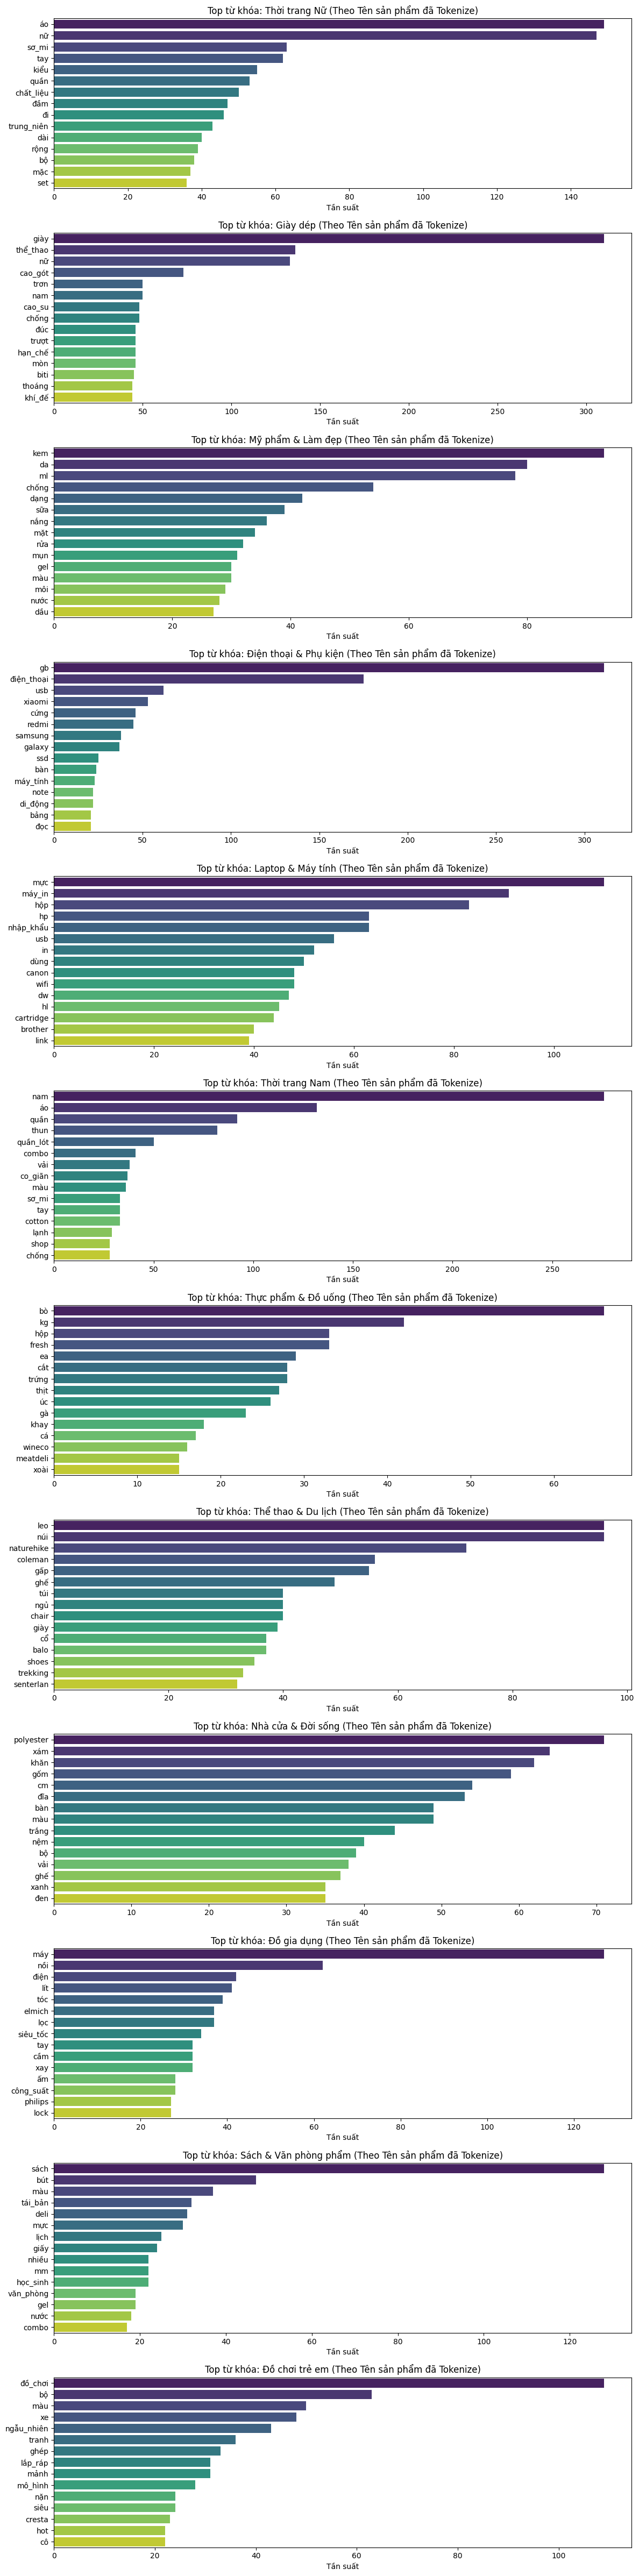

In [40]:
categories = df_cleaned['category'].unique()
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(12, 4 * len(categories)))

for i, cat in enumerate(categories):
    subset = df_cleaned[df_cleaned['category'] == cat]
    
    # Dùng cột 'name_tokenized' để phân tích
    top_words = get_top_keywords(subset['name_tokenized'], n=15)    
    words = [w[0] for w in top_words]
    counts = [w[1] for w in top_words]
    
    # Vẽ Barplot
    ax = axes[i] if len(categories) > 1 else axes
    sns.barplot(x=counts, y=words, hue=words, legend=False, ax=axes[i], palette='viridis')
    ax.set_title(f"Top từ khóa: {cat} (Theo Tên sản phẩm đã Tokenize)")
    ax.set_xlabel("Tần suất")

plt.tight_layout()
plt.savefig("visualizations/09_top_keywords_per_category.png", dpi=300)
plt.show()

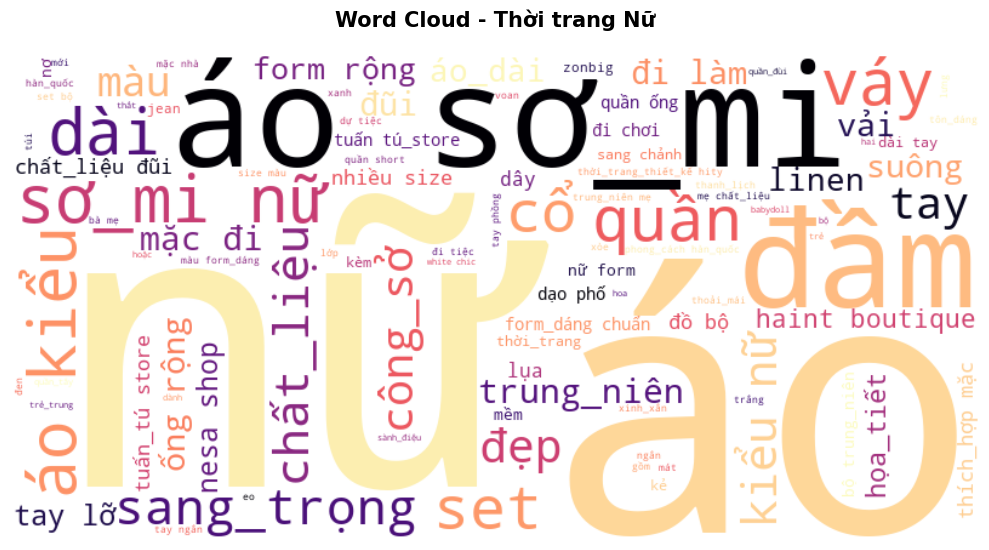

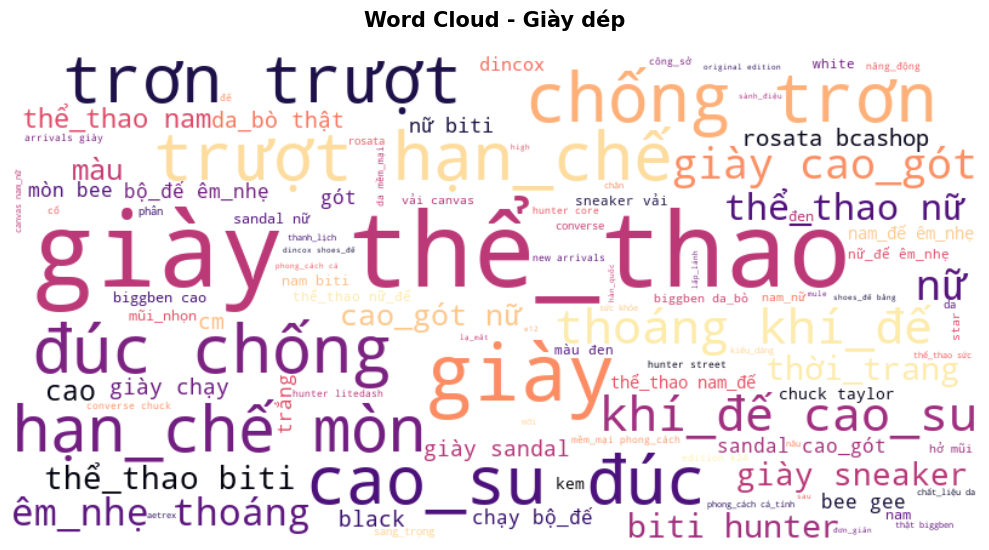

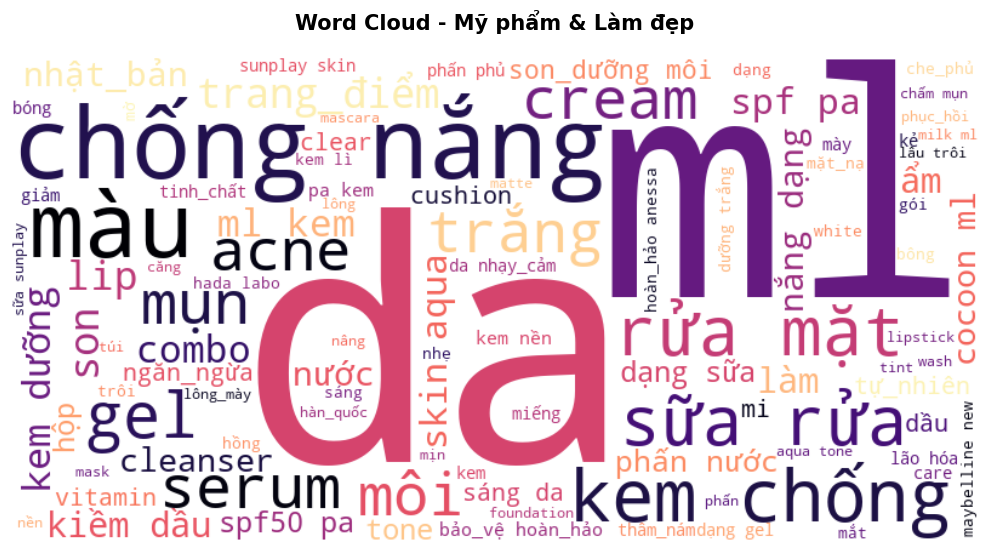

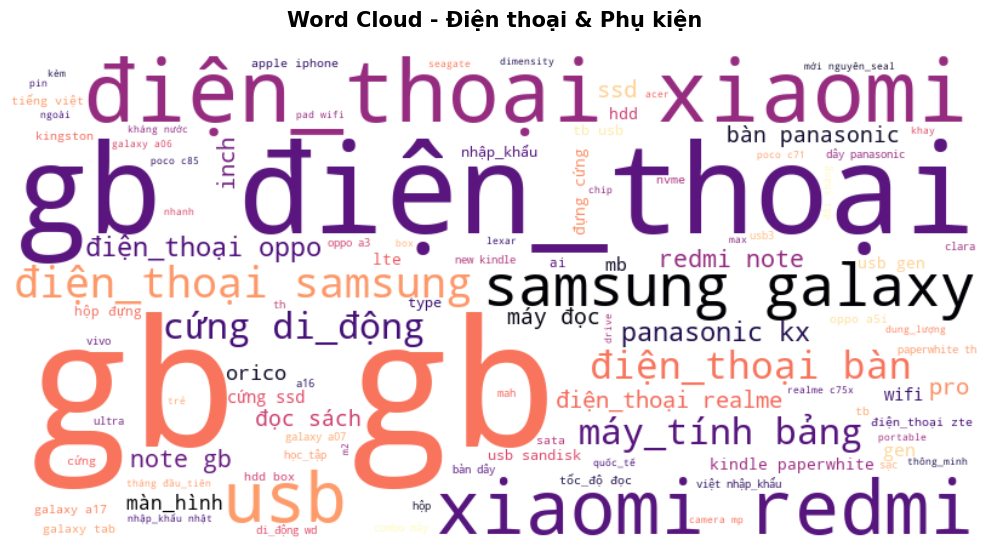

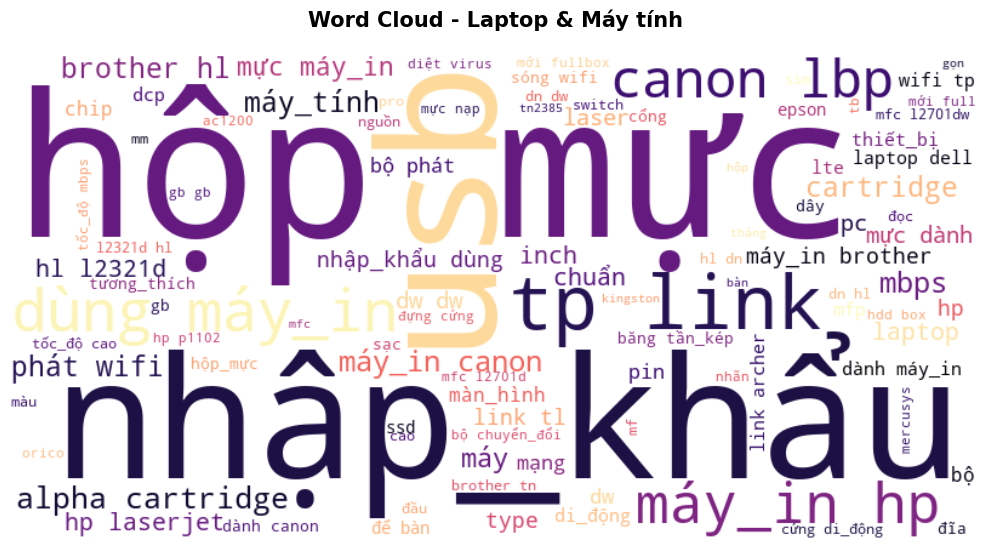

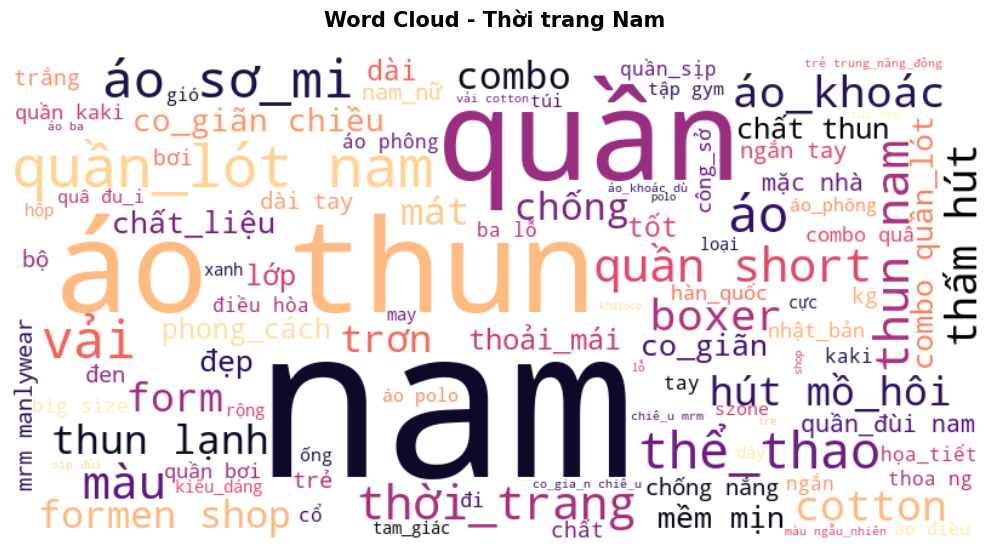

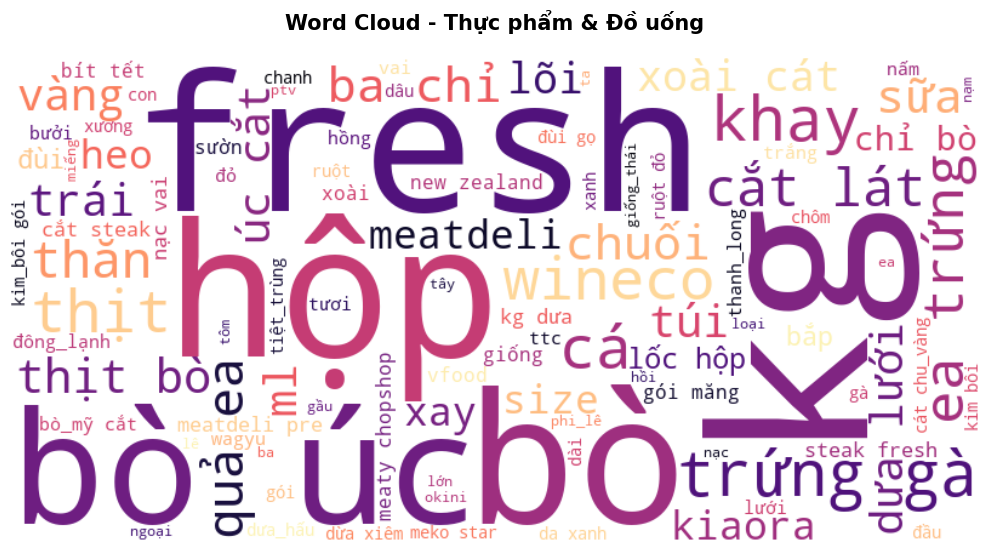

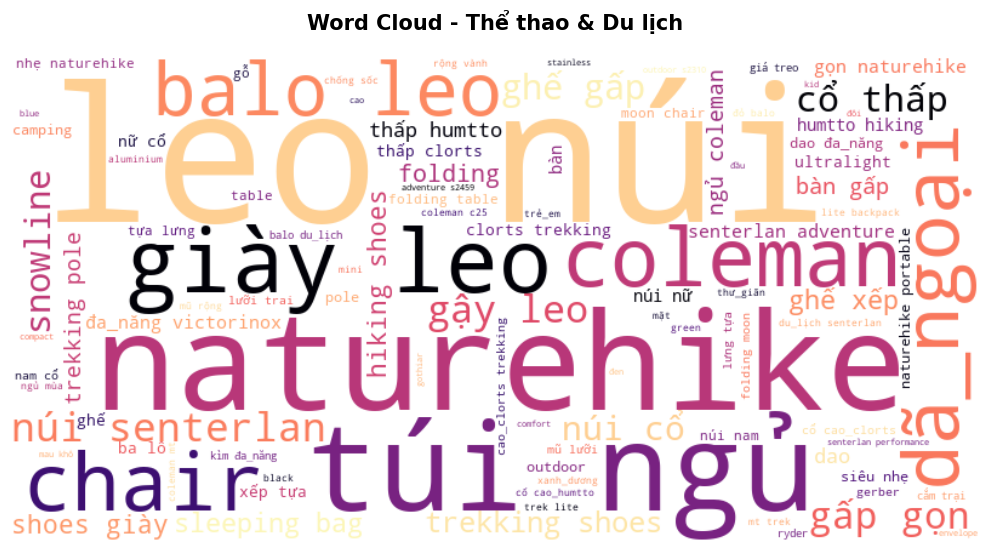

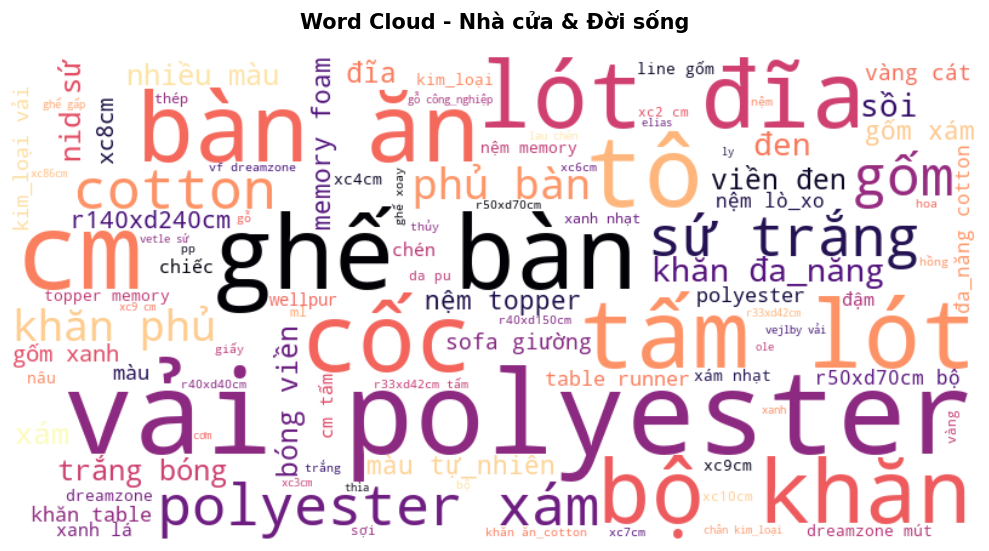

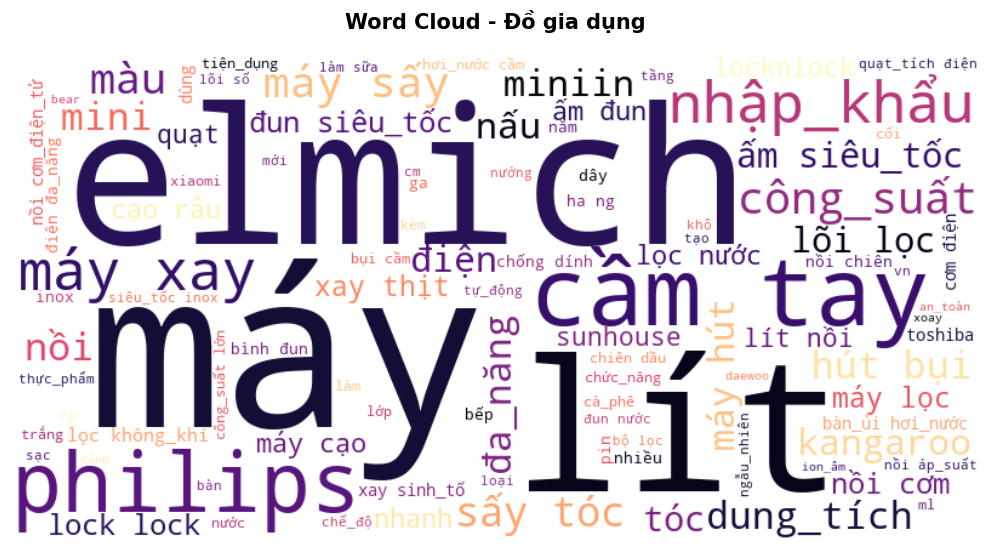

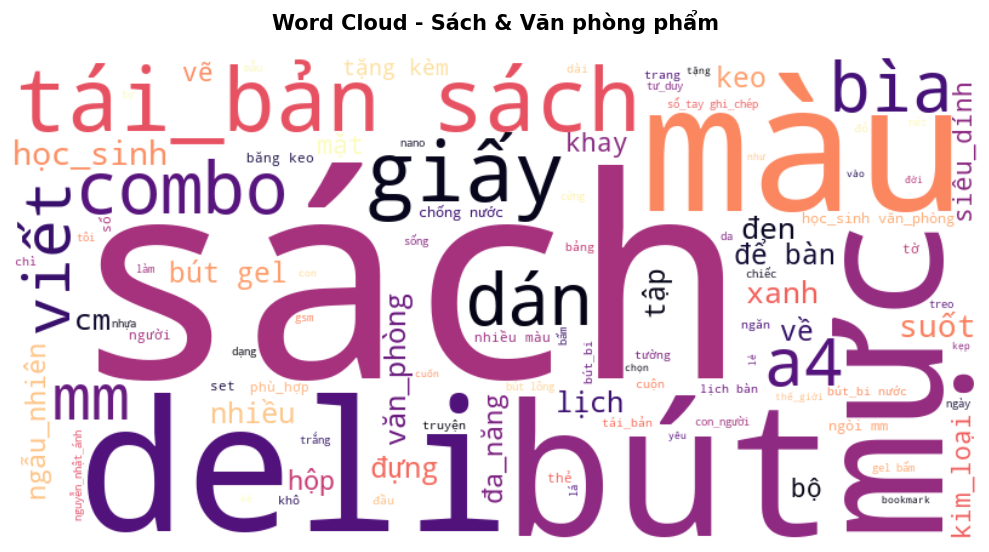

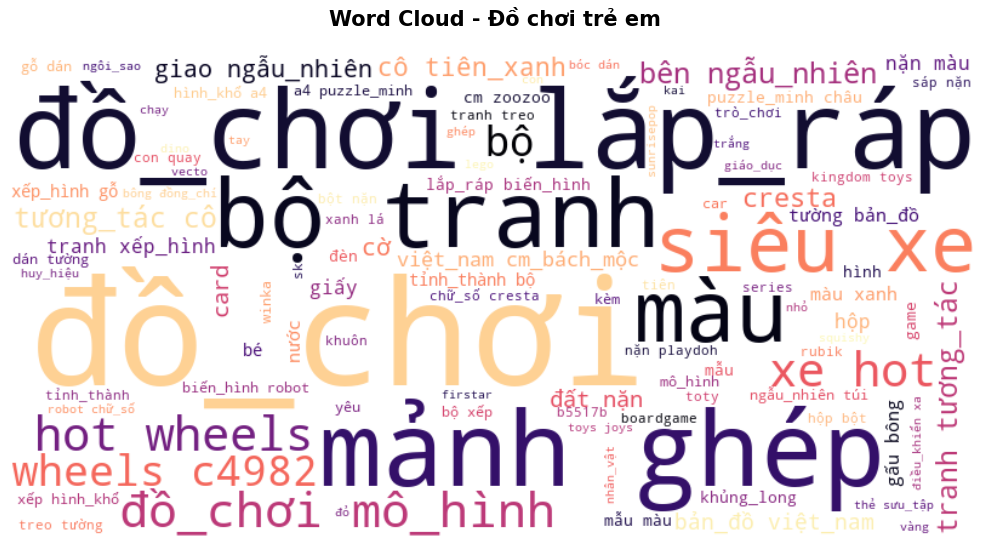

In [41]:
start = 10
for i, cat in enumerate(categories):
    text = ' '.join(df_cleaned[df_cleaned['category'] == cat]['name_tokenized'])
    
    wc = WordCloud(
        width=800, height=400,
        background_color='white',
        max_words=100,
        colormap='magma'  # Đổi màu khác cho lạ mắt
    ).generate(text)

    plt.figure(figsize=(10, 6))  # Tạo khung hình mới cho mỗi category
    save_path = f"visualizations/{start:02d}_wordcloud_{cat}.png"
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {cat}", fontsize=15, pad = 20, weight = 'bold')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    start += 1
